In [8]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
import sklearn.linear_model

# Differentiating Perceptron

A very short notebook that gives an idea of how the simple neural network model known as perceptron can be trained by computing a closed form gradient expression.
The chain rule then allows to generalize gradient calculation to arbitrary big multi layer network based on this idea.

In [6]:
# First, we load a toy dataset and play a bit with it
data, label = sklearn.datasets.load_digits(n_class=10, return_X_y=True)
nb_train = 1200
nb_test = 300
ids = np.random.choice(data.shape[0],nb_train+nb_test,replace=False) 
train_dataset = data[ids[:nb_train],:]
train_labels = label[ids[:nb_train]]
test_dataset = data[ids[nb_train:],:]
test_labels = label[ids[nb_train:]]

In [7]:
#try a simple linear model
def trainModel(nSamples,data,label):
  # skl is wants data to be: dimension 0: list of samples, dimension 1: features
  X = data[:nSamples,:]
  y = label[:nSamples]

  # run the classifier
  model = sklearn.linear_model.LogisticRegression(multi_class='multinomial',solver='saga')
  model.fit(X, y)
  return model

def testModel(model, data, label):
  X = data.reshape(-1, np.prod(data.shape[1:3]))
  test=label
  correct = model.predict(X) == label
  return np.count_nonzero(correct)/correct.size
    
# plot result function of training samples
nbSamplesConfig=[50, 100, 500, 1200]

scores = np.zeros(len(nbSamplesConfig))
for idx, nbSample in enumerate(nbSamplesConfig):
  model = trainModel(nbSample,train_dataset,train_labels)
  scores[idx]= testModel(model,test_dataset,test_labels)

/home/gnthibault/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


No handles with labels found to put in legend.


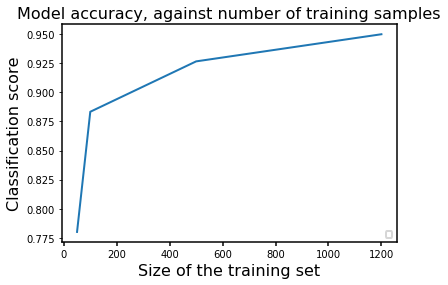

In [9]:
plt.plot(nbSamplesConfig,scores)
plt.xlabel('Size of the training set')
plt.ylabel('Classification score')
plt.legend(loc="lower right", fontsize='small')
plt.title('Model accuracy, against number of training samples')
plt.show()

## Differenciating the multi-class logisitc loss
We recall that logisitc loss L, reads:
\begin{align*}
  L(W,b) = c(s(Wx+b))
\end{align*}

Where:
  * $W$ is the weight, a $m\times n$ matrix, where each element is indexed: $W_{i,j}$
  * $b$ is the bias vector of size n, equivalent to the number of class
  * $c$ is the cross entropy function
  * $s$ is the softmax function

### Jacobian

We first recall that, for a function $f:\underset{\mathbb{R}^n}{x} \mapsto \underset{\mathbb{R}^n}{f(x)}$, we can derive the matrix of partial derivative, called the jacobian matrix:

\begin{align*}
  J=\begin{pmatrix}
    \frac{\partial f_0}{\partial x_0} & \frac{\partial f_0}{\partial x_1} & \dots & \frac{\partial f_0}{\partial x_{n-1}}\\
    \frac{\partial f_1}{\partial x_0} & \frac{\partial f_1}{\partial x_1} & \dots & \frac{\partial f_1}{\partial x_{n-1}}\\
  \vdots & \vdots & \vdots & \vdots \\
  \frac{\partial f_{n-1}}{\partial x_0} & \frac{\partial f_{n-1}}{\partial x_1} & \dots & \frac{\partial f_{n-1}}{\partial x_{n-1}}
\end{pmatrix}
\end{align*}

### Jacobian of cross entropy $c$ for a single sample

We recall that, given a vector $v$ of size $n$, and a set of probability (for each label) p of size $n$ (the number of classes), we have:
\begin{align*}
  c(v) = -\sum_{k=0}^{n-1} p_k log(v_k)
\end{align*}

Then the jacobian becomes a simple row vector (1 output, multiple input variables) which is very simple to compute:
\begin{align*}
  J_{cross} & \begin{pmatrix}
    \frac{\partial c}{\partial v_0} , \dots, \frac{\partial c}{\partial v_{n-1}} \end{pmatrix} \\
  = &\begin{pmatrix} -\frac{p_0}{v_0}, \dots, -\frac{p_{n-1}}{v_{n-1}} \end{pmatrix}
\end{align*}




### Jacobian for the softmax
For the case of softmax, given a vector $v$ of size $n$ (the number of classes), we have also an output of size n:
\begin{align*}
  s(v)_i = s_i = \frac{e^{v_i}}{\sum_{k=0}^{n-1}e^{v_k}}
\end{align*}

Let's now try to find $\frac{\partial s_i}{\partial v_j}$:

In the case $i\neq j$, we have to differentiate a function $f$ of the form $f(x)=\frac{a}{b+e^x}$, where $a=e^{v_i}$ and $b=\sum_{k\neq j}^{n-1}e^{v_k}$ which can be computed thanks to the composition rule ($(g\circ f)' = g'\circ f \times f'$) between $\frac{a}{x}$ and $b+e^x$: 
\begin{align*}
  f'(x) &= -\frac{a}{\left(b+e^x\right)^2} \times e^x\\
  &= -\frac{ae^x}{\left(b+e^x\right)^2}
\end{align*}
From there we can express:
\begin{align*}
  \frac{\partial s_i}{\partial v_j} &= -\frac{e^{v_i+v_j}}{\left(\sum_{k=0}^{n-1}e^{v_k}\right)^2} \\
  &= -s_i s_j
\end{align*}

Otherwise we have to differentiate a function $f$ of the form $f(x)=\frac{a e^x}{b+e^x}$, where $a=1$ and $b=\sum_{k\neq i}^{n-1}e^{v_k}$ which can be computed thanks to the multiplication rule ((uv)'=u'v+uv') between $\frac{a}{b+e^x}$ and $e^x$:
\begin{align*}
  f'(x) &= -\frac{ae^x}{\left(b+e^x\right)^2} \times e^x + \frac{a}{b+e^x} \times e^x\\
  &= -\frac{ae^{2x}}{\left(b+e^x\right)^2} + \frac{ae^x}{b+e^x}
\end{align*}
From there we can express:
\begin{align*}
  \frac{\partial s_i}{v_i} &= -\frac{e^{2v_i}}{\left(\sum_{k=0}^{n-1}e^{v_k}\right)^2} + \frac{e^{v_i}}{\sum_{k=0}^{n-1}e^{v_k}} \\
  &= \frac{e^{v_i}}{\sum_{k=0}^{n-1}e^{v_k}} \left( 1 - \frac{e^{v_i}}{\sum_{k=0}^{n-1}e^{v_k}}\right)\\
  &= s_i (1-s_i)
\end{align*}

Jacobian for the softmax is then a $n \times n$ matrix of the form:
\begin{align*}
  J_{soft}=\begin{pmatrix}
    s_0 (1-s_0) & -s_0 s_1 & \dots & -s_0 s_{n-1}\\
    -s_1 s_0 & s_1 (1-s_1) & -s_1 s_{n-1}\\
  \vdots & \vdots & \vdots & \vdots \\
  -s_{n-1} s_0 & -s_{n-1} s_1 & \dots & s_{n-1} (1-s_{n-1})
\end{pmatrix}
\end{align*}

### Jacobian of the linear part
We recall, that our linear model, for a single sample (feature vector) x, reads $f(x) = Wx+b$, and we are interested in differentiating this expression with respect to $W_{ij}$ and $b_i$.

\begin{align*}
  \frac{\partial f_i}{\partial W_{kj}} &= \begin{cases} x_k \quad &\text{ if } k=i \\ 0 & \text{otherwise} \end{cases}
\end{align*}

\begin{align*}
  \frac{\partial f_i}{\partial b_{j}} &= \begin{cases} 1 \quad &\text{ if } i=j \\ 0 & \text{otherwise} \end{cases}
\end{align*}

Jacobian for the linear part is a pretty big matrix, that has n rows and M columns where M is the total amount of parameters in both $W$ and $b$, and n is the number of classes we account for in the model:

\begin{align*}
  J_{lin}=\begin{pmatrix}
    \frac{\partial f_0}{\partial W_{00}} & \frac{\partial f_0}{\partial W_{01}} & \dots & \frac{\partial f_0}{\partial b_{0}} & \dots \\
    \frac{\partial f_1}{\partial W_{00}} & \frac{\partial f_1}{\partial W_{01}} & \dots & \frac{\partial f_1}{\partial b_{0}} & \dots \\
  \vdots & \vdots & \vdots & \vdots \\
  \frac{\partial f_{n-1}}{\partial W_{00}} & \frac{\partial f_{n-1}}{\partial W_{01}} & \dots & \frac{\partial f_{n-1}}{\partial b_{0}} & \dots \\
\end{pmatrix}
\end{align*}

### Composition Rule
Let's recall the composition rule with 3 fnctions: $c,s$ and $l$ in $x$:
\begin{align*}
  (c \circ s \circ l)'(x) = (c' \circ s \circ l)(x) \times (s' \circ l)(x) \times l'(x)
\end{align*}

### Composition rule with partial derivatives 

We recall the chain rule in higher dimensions, using the jacobian matrix (matrix of partial derivative):

\begin{align*}
  J_{f\circ g}(a) = J_{f}(g(a)) J_g(a)
\end{align*}

Which, gives, in the case of 3 mappings:

\begin{align*}
  J_{c\circ s \circ l}(a) &= J_{c}(s\circ l(a)) J_s(c(a)) J_l(a) \\
  &= J_{cross}(s\circ l(a)) J_{soft}(c(a)) J_{lin}(a)
\end{align*}


## Gradient descent and convexity
We won't prove here that optimizing this multiclass logisitc regression in convex, but let's assume it is, and that we can use gradient descent on it

In [58]:
# Now doing this by hand
def crossEntropy(label,y):
  '''label and y are a nSample*nClass matrices'''
  #print('Cross input is '+str(label.shape)+'  '+str(y.shape))
  return -np.dot(label.flatten(),np.log(y).flatten())

def softmax(x):
  '''x is a nSample*nClass matrices'''
  #print('softmax input is '+str(x.shape))
  exp = np.exp(x)
  ret = (exp.T/exp.T.sum(axis=0)).T
  #print('softmax output should be same as input '+str(ret.shape))
  return ret

def linearModel(weight, bias, features):
  '''weight a nClass*nFeatures matrix
     bias a nClass vector
     features is a nSample*nFeatures matrix
     output should be a nSample*nClass matrix
    '''
  #print('linear input is '+str(weight.shape)+'  '+str(bias.shape)+'  '+str(features.shape))
  ret=np.dot(weight,features.T).T+bias
  #print('output should be compliant with labels '+str(ret.shape))
  return ret

def loss(weight,bias,features,labels):
  return crossEntropy(labels, softmax(linearModel(weight,bias,features)))

In [59]:
def gradientWb(weight, bias, features, labels):
  " return gradient for W and b as a tuple"
  nSample=labels.shape[0]
  nClass=labels.shape[1]
  nFeatures=weight.shape[1]
  gradW=np.zeros(weight.size)
  gradB=np.zeros(bias.size)
  for sample in range(nSample):
    # computing local values for reuse
    linLocal=linearModel(weight, bias, features[sample,:])
    softLocal=softmax(linLocal)
    # computing cross entropy jacobian for single sample
    Jcross_sol = np.divide(-labels[sample,:], softLocal)
    Jcross_sol = Jcross_sol.reshape(1,-1)
    # computing softmax jacobian for single sample
    Jsoft_l = -np.outer(softLocal, softLocal)
    np.fill_diagonal(Jsoft_l, softLocal*(1-softLocal))
    # computing linear jacobian separately for W and b
    JlW = np.zeros((nClass,weight.size))
    Jlb = np.identity(bias.size)
    for i in range(nClass):
      JlW[i,i*nFeatures:(i+1)*nFeatures]=features[sample,:]
    Jprod=np.dot(Jcross_sol,Jsoft_l).reshape(1,-1)
    #print('Jprod is '+str(Jprod.shape)+' jlW is '+str(JlW.shape))
    gradW+=np.dot(Jprod,JlW).flatten()
    gradB+=np.dot(Jprod,Jlb).flatten()
  return gradW.reshape(weight.shape), gradB.reshape(bias.shape)

In [14]:
def makeMultiClassLabel(label,nbclass):
  '''Make 2d 1-hot encoded matrix from 1d integer list'''
  #nbclass=np.unique(label).size
  ret=np.zeros((label.size,nbclass))
  ret[(range(label.size),label)]=1 
  return ret

def selectData(nSamples,data,label):
  # We want data to be: dimension 0: list of samples, dimension 1: features
  x = data[:nSamples,:]
  y = makeMultiClassLabel(label[:nSamples],10)
  return x,y

In [15]:
stepLength = 1e-4
nbIter=500

#Select input data
nbSample=800
features, labels = selectData(nbSample,train_dataset,train_labels)

#Sizes
nbClass=labels.shape[1]
nbFeatures=features.shape[1]

#Perform gradient descent
w=np.random.rand(nbClass,nbFeatures)
b=np.random.rand(nbClass)
losslist = []
for i in range(nbIter):
  gW,gB=gradientWb(w, b, features, labels)
  w-=stepLength*gW
  b-=stepLength*gB
  l=loss(w, b, features, labels)
  #print('loss is '+str(l))
  losslist.append(l)

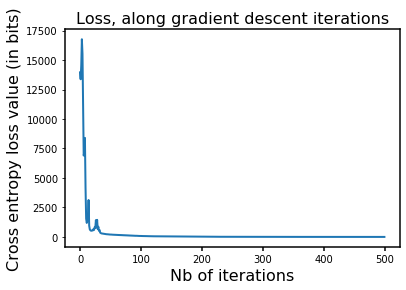

Accuracy is 0.91


In [16]:
plt.figure()
plt.plot(np.arange(nbIter),losslist)
plt.xlabel('Nb of iterations')
plt.ylabel('Cross entropy loss value (in bits)')
plt.title('Loss, along gradient descent iterations')
plt.show()

nbSample=test_labels.size
nbClass=10
features, labels = selectData(nbSample,test_dataset,test_labels)

prediction = softmax(linearModel(w,b,features)).reshape(nbSample,nbClass).T
#print('prediction '+str(prediction))
#print('max pred '+str(prediction.max(axis=0)))
prediction=(prediction==prediction.max(axis=0)).T
#print('1 hot pred '+str(prediction))
#print('labels '+str(labels))
prediction=(prediction * labels)
#print('labels*pred '+str(prediction))

accuracy = np.count_nonzero(prediction)/prediction.shape[0]
print('Accuracy is '+str(accuracy))

## Simplified version

Following the chain rule, and given the fact that probability labels are one-hot encoded, we should be able to give a more simple version.

In this case, the Cross-entropy function jacobian for a single sample whose label is k looks like that:
\begin{align*}
  \begin{pmatrix} 0 & \dots & 0 & -\frac{1}{s_k} & 0 & \dots & 0\end{pmatrix}
\end{align*}

Then, there is only one useful row (the $k^{th}$ row) in the softmax jacobian:

\begin{align*}
  J_{soft}=\begin{pmatrix}
   0 & 0 & \dots & \dots & \dots & 0\\
   \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \\
   -s_k s_0 & -s_k s_1 & \dots & s_k(1-s_k) & \dots & -s_k s_{n-1}\\
   \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \\
   0 & 0 & \dots & \dots & \dots & 0\\
\end{pmatrix}
\end{align*}

Moreover, we recall that there was only one useful 

In [60]:
def gradientWbv1(weight, bias, features, labels):
  " return gradient for W and b as a tuple"
  nSample=labels.shape[0]
  nClass=labels.shape[1]
  nFeatures=weight.shape[1]
  gradW=np.zeros_like(weight)
  gradB=np.zeros_like(bias)
  for sample in range(nSample):
    # computing local values for reuse
    linLocal=linearModel(weight, bias, features[sample,:])
    softLocal=softmax(linLocal)
    # Right class idx
    rc = labels[sample,:].argmax()
    src = softLocal[rc]
    # Now jcross is a single value
    Jcross_sol = -1/src
    # Now Jsoft is a single value as well
    Jsoft_l = src*(1-src)
    # When looking carefully, we have Jcross_sol*Jsoft_l=src-1
    prod = src-1
    # Now we can directly update gradient
    gradW[rc,:]+=features[sample,:]*prod
    gradB[rc]+=prod
  return gradW, gradB

In [61]:
def gradientWbv2(weight, bias, features, labels):
  " Yeah, this one is a bit trickier to understand without pen and paper"
  softLocal = softmax(linearModel(weight, bias, features))
  rc = labels.argmax(axis=1)
  prod = softLocal[np.arange(labels.shape[0]),rc]-1
  gradW = np.dot(labels.T,(features.T*prod).T)
  gradB = np.dot(labels.T,prod)
  return gradW, gradB

In [64]:
stepLength = 5e-5
nbIter=80

#Select input data
nbSample=800
features, labels = selectData(nbSample,train_dataset,train_labels)

#Sizes
nbClass=labels.shape[1]
nbFeatures=features.shape[1]

#Perform gradient descent
w=np.random.rand(nbClass,nbFeatures)
b=np.random.rand(nbClass)
losslist = []
for i in range(nbIter):
  gW,gB=gradientWbv1(w, b, features, labels)
  w-=stepLength*gW
  b-=stepLength*gB
  l=loss(w, b, features, labels)
  #print('loss is '+str(l))
  losslist.append(l)

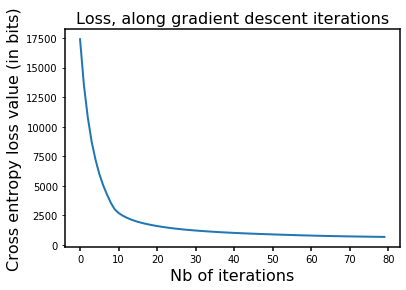

Accuracy is 0.89


In [65]:
plt.figure()
plt.plot(np.arange(nbIter),losslist)
plt.xlabel('Nb of iterations')
plt.ylabel('Cross entropy loss value (in bits)')
plt.title('Loss, along gradient descent iterations')
plt.show()
nbSample=test_labels.size
nbClass=10
features, labels = selectData(nbSample,test_dataset,test_labels)
prediction = softmax(linearModel(w,b,features)).reshape(nbSample,nbClass).T
prediction = prediction.argmax(axis=0)
labels = labels.argmax(axis=1)
prediction = np.logical_and(prediction, labels)
accuracy = np.count_nonzero(prediction)/prediction.size
print('Accuracy is '+str(accuracy))